In [1]:
# Bu projeyi Pycaret ile cozmeye calistim colab kullandim fakat Ram kaldirmadi ve hata verdi
# Classification


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)

In [3]:
df=pd.read_csv("LoansTrainingSet.csv")

In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [5]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [6]:
df.shape

(256984, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [8]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [9]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [10]:
df.shape

(256984, 19)

In [11]:
m=df[['Credit Score','Years in current job','Annual Income','Months since last delinquent','Bankruptcies']]
m

,Credit Score,Years in current job,Annual Income,Months since last delinquent,Bankruptcies
0,741.0,10+ years,33694.0,41.0,0.0
1,734.0,4 years,42269.0,NaN,0.0
2,747.0,10+ years,90126.0,NaN,0.0
3,747.0,10+ years,38072.0,NaN,0.0
4,746.0,4 years,50025.0,NaN,0.0
...,...,...,...,...,...
256979,NaN,2 years,NaN,NaN,0.0
256980,737.0,10+ years,77186.0,47.0,0.0
256981,7460.0,9 years,52504.0,82.0,0.0
256982,746.0,9 years,52504.0,82.0,0.0


In [12]:
# float ve int bos olanlari ortala deger ile doluralim
#object olan Years in current job ise harflerden arindirirp int e cevirelim

In [13]:
df['Credit Score'].fillna(df['Credit Score'].mean(),inplace=True)
df['Annual Income'].fillna(df['Annual Income'].mean(),inplace=True)
df['Months since last delinquent'].fillna(df['Months since last delinquent'].mean(),inplace=True)
df['Months since last delinquent']=df['Months since last delinquent'].astype(int) 
df['Bankruptcies'].fillna(df['Bankruptcies'].mean(),inplace=True)
df['Months since last delinquent']=df['Months since last delinquent'].astype(int) 
df['Tax Liens'].fillna(df['Tax Liens'].mean(),inplace=True)

In [14]:
df[['Months since last delinquent']]

,Months since last delinquent
0,41
1,34
2,34
3,34
4,34
...,...
256979,34
256980,47
256981,82
256982,82


In [15]:
#Years in current job de bulunan years ve noktalama işaretleri kaldırıldı
df['Years in current job'].replace('[^0-9]',"",inplace=True,regex=True)
#ve bos olan alanlara 0 değeri atandı
df['Years in current job'].fillna('0',inplace=True)
#Years in current job int değerine çevrildi
df['Years in current job']=df['Years in current job'].astype(int)
#Years in current job int değerine çevrildi
df['Years in current job'].replace('0',df['Years in current job'].mean(),inplace=True)

In [16]:
#Monthly Debt object türünde fazla olan semboller kaldırılarak float türüne çevrildi
df['Monthly Debt'].replace('[^0-9.]','',inplace=True,regex=True)
df['Monthly Debt']=df['Monthly Debt'].astype(float)

In [17]:
df['Maximum Open Credit'].replace('[a-zA-Z@_!#$%^&*()<>?/\|}{~:]',"0",inplace=True,regex=True)
df['Maximum Open Credit']=df['Maximum Open Credit'].astype(float)

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

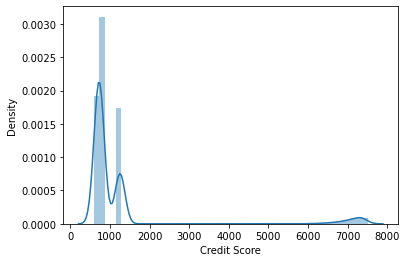

In [18]:
sns.distplot(df['Credit Score'])


<AxesSubplot:xlabel='Annual Income', ylabel='Density'>

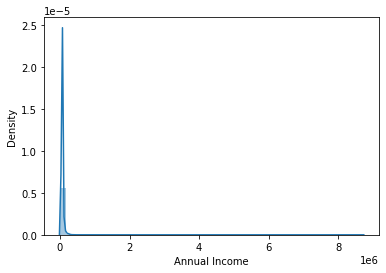

In [19]:
sns.distplot(df['Annual Income'])


<AxesSubplot:xlabel='Months since last delinquent', ylabel='Density'>

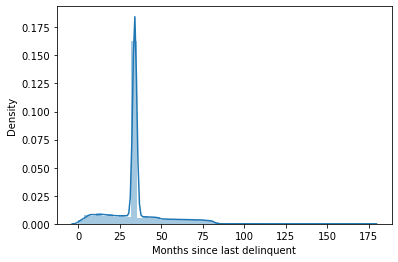

In [20]:
sns.distplot(df['Months since last delinquent'])


<AxesSubplot:xlabel='Bankruptcies', ylabel='Density'>

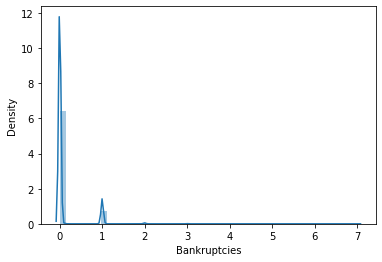

In [21]:
sns.distplot(df['Bankruptcies'])


<AxesSubplot:xlabel='Monthly Debt', ylabel='Density'>

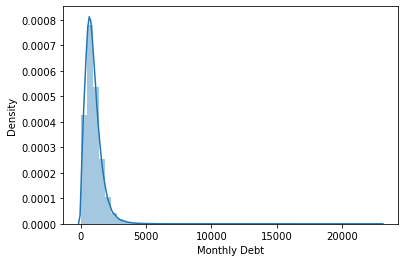

In [22]:
sns.distplot(df['Monthly Debt'])


<AxesSubplot:xlabel='Tax Liens', ylabel='Density'>

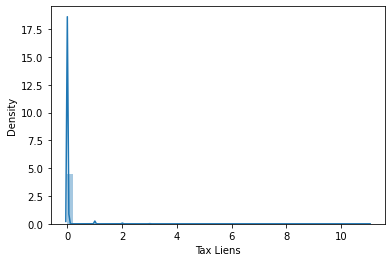

In [23]:
sns.distplot(df['Tax Liens'])

In [24]:
#grafiklerde normal degerlerin cok disinda kalan degerleri cikaralim
df=df[df['Credit Score']<2000]

In [25]:
df=df[df['Months since last delinquent']<90]

In [26]:
df=df[df['Bankruptcies']<3]

In [27]:
df=df[df['Tax Liens']<3]

In [28]:
df=df[df['Monthly Debt']<5000]

In [29]:
df.shape

(239817, 19)

In [30]:
df['Loan Status'].value_counts()

Fully Paid     175516
Charged Off     64301
Name: Loan Status, dtype: int64

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

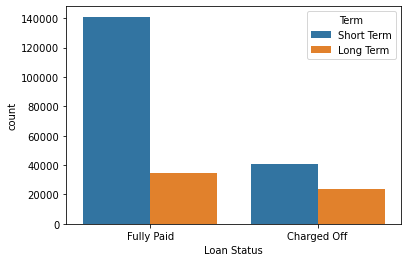

In [31]:
sns.countplot(df['Loan Status'],hue=df['Term'])

In [32]:
#Home Ownership verilerini düzenlememiz gerekmekte
df['Home Ownership'].replace(['HaveMortgage','Home Mortgage'],'Mortgage',inplace=True)

In [33]:
#Purpose alanlarını düzenleyelim
df['Purpose'].replace('other','Other',inplace=True)

In [34]:
#Id leri cikaralim cunku heasplamaya dahil etmeyelim
df=df.drop(['Loan ID','Customer ID'],axis=1)

In [35]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [36]:
df.shape

(239817, 17)

In [37]:
df

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,11520,Short Term,741.000000,10,Mortgage,33694.000000,Debt Consolidation,584.03,12.3,41,10,0,6760,16056.0,0.0,0.0
1,Fully Paid,3441,Short Term,734.000000,4,Mortgage,42269.000000,Other,1106.04,26.3,34,17,0,6262,19149.0,0.0,0.0
2,Fully Paid,21029,Short Term,747.000000,10,Mortgage,90126.000000,Debt Consolidation,1321.85,28.8,34,5,0,20967,28335.0,0.0,0.0
3,Fully Paid,18743,Short Term,747.000000,10,Own Home,38072.000000,Debt Consolidation,751.92,26.2,34,9,0,22529,43915.0,0.0,0.0
4,Fully Paid,11731,Short Term,746.000000,4,Rent,50025.000000,Debt Consolidation,355.18,11.5,34,12,0,17391,37081.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256978,Charged Off,11953,Short Term,717.000000,10,Mortgage,39844.000000,Debt Consolidation,982.82,11.7,34,9,1,4176,4783.0,1.0,0.0
256979,Fully Paid,3911,Short Term,1251.116099,2,Rent,71952.716187,Debt Consolidation,1706.58,19.9,34,16,0,43992,44080.0,0.0,0.0
256980,Fully Paid,5078,Short Term,737.000000,10,Own Home,77186.000000,Debt Consolidation,1376.47,19.1,47,9,0,1717,9758.0,0.0,0.0
256982,Charged Off,12116,Short Term,746.000000,9,Mortgage,52504.000000,Debt Consolidation,297.96,15.1,82,8,0,3315,20090.0,0.0,0.0


In [38]:
# Get dummnies ile tablomuzu sayilara cevirelim
# x=pd.get_dummies(x,drop_first=True)

# NOT: Get dummnies ile datayi yeterli RAM olmadigi icin ceviremedi. Bu sebeple sadeceobject degerlerini aldim get dummnies uygulayip dataya ekledim

In [39]:
#Bu object degerlere uygulama yaptim
get_dummnies_data=df[['Loan Status','Term','Home Ownership','Purpose']]

In [40]:
get_dummnies_data

,Loan Status,Term,Home Ownership,Purpose
0,Fully Paid,Short Term,Mortgage,Debt Consolidation
1,Fully Paid,Short Term,Mortgage,Other
2,Fully Paid,Short Term,Mortgage,Debt Consolidation
3,Fully Paid,Short Term,Own Home,Debt Consolidation
4,Fully Paid,Short Term,Rent,Debt Consolidation
...,...,...,...,...
256978,Charged Off,Short Term,Mortgage,Debt Consolidation
256979,Fully Paid,Short Term,Rent,Debt Consolidation
256980,Fully Paid,Short Term,Own Home,Debt Consolidation
256982,Charged Off,Short Term,Mortgage,Debt Consolidation


In [42]:
get_dummnies_data=pd.get_dummies(get_dummnies_data,drop_first=True)

In [43]:
get_dummnies_data

,Loan Status_Fully Paid,Term_Short Term,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,1,1,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,1,0,0,0,0,0
3,1,1,1,0,0,0,1,0,0,0,0,0
4,1,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
256978,0,1,0,0,0,0,1,0,0,0,0,0
256979,1,1,0,1,0,0,1,0,0,0,0,0
256980,1,1,1,0,0,0,1,0,0,0,0,0
256982,0,1,0,0,0,0,1,0,0,0,0,0


In [44]:
#Get dummnies yapacagim kismi cikardim
df=df.drop(df[['Loan Status','Term','Home Ownership','Purpose']],axis=1)

In [45]:
#Get dummnies uyguladigim kisim ile datayi birlestirdim
x = pd.concat([df,get_dummnies_data],axis=1)

In [46]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239817 entries, 0 to 256983
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           239817 non-null  int64  
 1   Credit Score                  239817 non-null  float64
 2   Years in current job          239817 non-null  int32  
 3   Annual Income                 239817 non-null  float64
 4   Monthly Debt                  239817 non-null  float64
 5   Years of Credit History       239817 non-null  float64
 6   Months since last delinquent  239817 non-null  int32  
 7   Number of Open Accounts       239817 non-null  int64  
 8   Number of Credit Problems     239817 non-null  int64  
 9   Current Credit Balance        239817 non-null  int64  
 10  Maximum Open Credit           239817 non-null  float64
 11  Bankruptcies                  239817 non-null  float64
 12  Tax Liens                     239817 non-nul

In [49]:
x,y=x.drop('Loan Status_Fully Paid',axis=1),x[['Loan Status_Fully Paid']]

In [50]:
x.shape,y.shape

((239817, 24), (239817, 1))

In [ ]:
#!pip install xgboost

In [51]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    algos=[g,b,SVC,KN,D,R,Log,XGBC]
    algo_names=['GaussianNB','BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)  

In [52]:
classification_funct(x,y)

(191853, 24) (47964, 24) (191853, 1) (47964, 1)


,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.892164,0.949381,0.841452,0.831457
XGBClassifier,0.847281,0.927862,0.779577,0.754357
SVC,0.846853,1.000000,0.734384,0.734384
BernoulliNB,0.846761,0.997956,0.735351,0.734739
LogisticRegression,0.846749,0.999744,0.734365,0.734238
DecisionTreeClassifier,0.821356,0.797723,0.846432,0.745163
KNeighborsClassifier,0.808627,0.846241,0.774214,0.705842
GaussianNB,0.342970,0.207132,0.996449,0.417188
